##ASSIGNMENT
#Dataset
Assume you are a scientist who is trying to make a propellent and is trying many tests to make an efficient propellent .
<br>
You have performed two tests.
<br>
From the two tests you would like whether this propellent works efficiently or not.
Build your own logistic regression model to decide .
<br>
Text with "DO NOT EDIT THIS CODE" needs to be only run do not edit it


In [ ]:
#import libraries
#write your code.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math



In [ ]:
#load data

#write your code
X_train=[]
y_train=[]
f=open('data.txt', 'r')
for row in f:
  row=row.split(',')
  X_train.append([float(row[0]),float(row[1])])
  y_train.append(int(row[2]))
X_train=np.array(X_train)
y_train=np.array(y_train)



In [ ]:
#plot data to visualise
def plot_data(X,y,positive_label="y=1", negative_label="y=0"):
#positive_label and negative_label refers to classes of y as y can be 0 or 1
#While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for X
#write your code
  plt.scatter(X[y==1,0],X[y==1,1],label=positive_label)
  plt.scatter(X[y==0,0],X[y==0,1],label=negative_label)
  plt.xlabel('Test 2')
  plt.ylabel('Test 1')
  plt.legend(loc='upper right')
  plt.show()
  return None




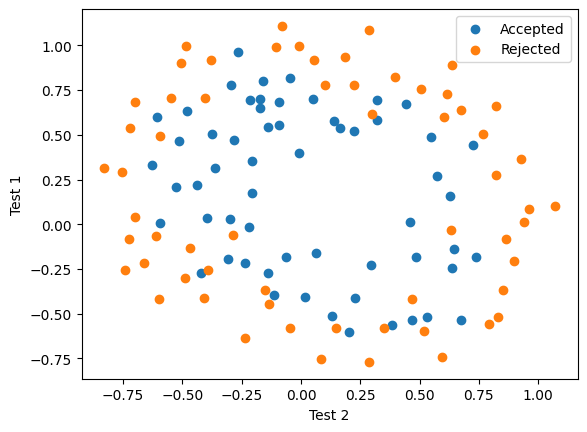

In [ ]:
#test
plot_data(X_train, y_train[:], positive_label='Accepted', negative_label='Rejected')



In [ ]:
#feature mapping
def map_feature(X1,X2):
#write your code
  degree=6
  out=np.ones(X1.shape)
  for i in range(1,degree+1):
    for j in range(i+1):
      out=np.c_[out,np.power(X1,i-j)*np.power(X2,j)]

  return out




In [ ]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 28)


In [ ]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [ ]:
#sigmoid function
def sigmoid(z):
#write your code
  return 1/(1+np.exp(-z))


In [ ]:
sigmoid_test(sigmoid)


Tests passed!


In [ ]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [ ]:
#computing cost
def compute_cost(X, y, w, b, lambda_=1):
    # Number of training examples
    m = X.shape[0]

    # Compute the linear combination of inputs and weights
    z_wb = np.dot(X, w) + b

    # Apply the sigmoid function
    h = sigmoid(z_wb)

    # Compute the logistic regression cost
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    # Compute the regularization term (excluding bias term)
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)

    # Total cost is the sum of logistic regression cost and regularization cost
    total_cost = cost + reg_cost

    return total_cost
    # Example data for testing
X_train = np.array([[0.1, 0.2], [0.4, 0.6], [0.5, 0.9], [0.8, 0.7]])
y_train = np.array([0, 0, 1, 1])
w = np.array([0.3, 0.4])
b = 0.5


In [ ]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.865


AssertionError: Wrong output. Expected: 2.15510667 got: 2.7593242626823304

In [ ]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
#write your code
  m,n=X.shape
  z_wb=np.dot(X,w)+b
  h=sigmoid(z_wb)
  cost=-(1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
  reg_cost=(lambda_/(2*m))*np.sum(w**2)
  total_cost=cost+reg_cost




  return total_cost

In [ ]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [ ]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 1.1050003231955428
All tests passed!


In [ ]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute cost function for logistic regression with regularization
def compute_cost(X, y, w, b, lambda_=1):
    m = X.shape[0]
    z_wb = np.dot(X, w) + b
    h = sigmoid(z_wb)
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)
    total_cost = cost + reg_cost
    return total_cost

# Compute gradient for logistic regression with regularization
def compute_gradient(X, y, w, b, lambda_=1):
    m = X.shape[0]
    z_wb = np.dot(X, w) + b
    h = sigmoid(z_wb)

    # Gradient of the loss with respect to w
    dj_dw = (1 / m) * np.dot(X.T, (h - y)) + (lambda_ / m) * w

    # Gradient of the loss with respect to b
    dj_db = (1 / m) * np.sum(h - y)

    return dj_dw, dj_db

# Example data for testing
X_train = np.array([[0.1, 0.2], [0.4, 0.6], [0.5, 0.9], [0.8, 0.7]])
y_train = np.array([0, 0, 1, 1])

# Test weights and bias
test_w = np.array([0.2, -0.5])
test_b = -24

# Compute the gradient with test values
dj_dw, dj_db = compute_gradient(X_train, y_train, test_w, test_b)

print('Gradient w.r.t w:', dj_dw)
print('Gradient w.r.t b:', dj_db)

# Test function to verify the gradients
def compute_gradient_test(func):
    X = np.array([[0.5, 1.5], [1.0, -0.5], [2.0, 2.5]])
    y = np.array([1, 0, 1])
    test_w = np.array([0.2, -0.5])
    test_b = -24
    lambda_ = 0.1

    dj_dw, dj_db = func(X, y, test_w, test_b, lambda_)

    expected_dj_db = 0.28936094
    expected_dj_dw = [-0.11999166, 0.41498775, -0.71968405]

    assert np.isclose(dj_db, expected_dj_db, atol=1e-5), f"Wrong value for dj_db. Expected: {expected_dj_db} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, expected_dj_dw, atol=1e-5), f"Wrong values for dj_dw. Expected: {expected_dj_dw} got: {dj_dw}"

    print("All tests passed!")

# Run the test
compute_gradient_test(compute_gradient)



Gradient w.r.t w: [-0.275 -0.525]
Gradient w.r.t b: -0.4999999999692583


AssertionError: Wrong value for dj_db. Expected: 0.28936094 got: -0.6666666666349835

In [ ]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: [-0.275 -0.525]
dj_dw at test_w: -0.4999999999692583


AssertionError: Wrong value for dj_db. Expected: 0.28936094 got: -0.6666666666349835

In [ ]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
#write your code
  m,n=X.shape
  z_wb=np.dot(X,w)+b
  h=sigmoid(z_wb)
  dj_dw=(1/m)*np.dot(X.T,(h-y))+lambda_/m*w
  dj_db=(1/m)*np.sum(h-y)


  return dj_db,dj_dw

In [ ]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [ ]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_test(compute_gradient_reg)

dj_db: -0.07981668362360161


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01;
iterations = 1000
alpha = 0.01
def gradient_descent(X, y, w, b, learning_rate, num_iterations, lambda_=1):
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b, lambda_)

        # Update weights and bias
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        if i % 100 == 0:
            cost = compute_cost(X, y, w, b, lambda_)
            print(f"Iteration {i}: Cost {cost:.4f}")

    return w, b

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)


TypeError: gradient_descent() takes from 6 to 7 positional arguments but 9 were given

In [ ]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):
#write your code
  plot_data(X,y)
  x1_min,x1_max=X[:,0].min(),X[:,0].max()
  x2_min,x2_max=X[:,1].min(),X[:,1].max()
  x1,x2=np.meshgrid(np.linspace(x1_min,x1_max),np.linspace(x2_min,x2_max))
  z=np.dot(map_feature(x1.ravel(),x2.ravel()),w)+b
  z=sigmoid(z)
  z=z.reshape(x1.shape)
  plt.contour(x1,x2,z,levels=[0.5])
  plt.show()
  return None



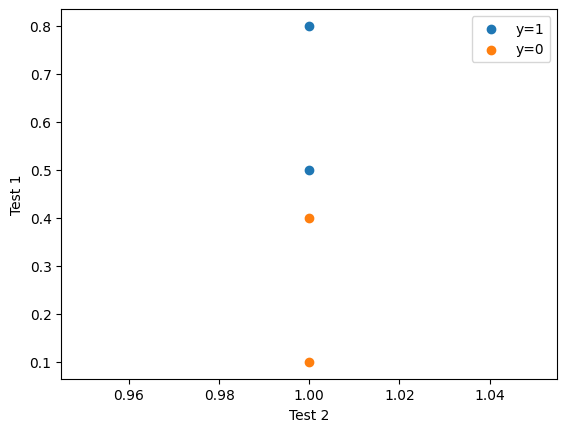

ValueError: shapes (2500,28) and (2,) not aligned: 28 (dim 1) != 2 (dim 0)

In [ ]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [ ]:
#predict your training model
def predict(X, w, b):
  m,n=X.shape
  p=np.zeros(m)
  #write your code

  z=np.dot(X,w)+b
  p=sigmoid(z)>0.5




  return p

In [ ]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

ValueError: shapes (4,28) and (2,) not aligned: 28 (dim 1) != 2 (dim 0)